In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train[1].shape

(32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
classes[9]

'truck'

In [49]:
def plt_sample(X,y,index):
    plt.figure(figsize=(13,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

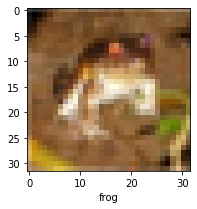

In [50]:
plt_sample(X_train,y_train,0)

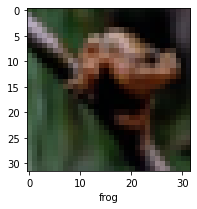

In [51]:
plt_sample(X_train,y_train,5000)

In [26]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0].shape

(32, 32, 3)

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.8570 - accuracy: 0.3336
Epoch 2/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6546 - accuracy: 0.4154
Epoch 3/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.5687 - accuracy: 0.4473
Epoch 4/5
1563/1563 [==============================] - 41s 27ms/step - loss: 1.5071 - accuracy: 0.4686
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4540 - accuracy: 0.4880


In [33]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.4521 - accuracy: 0.4812


[1.4521292448043823, 0.4812000095844269]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [36]:
y_pred=ann.predict(X_test)
y_pred

array([[1.6983449e-03, 4.3306053e-03, 1.8436760e-02, ..., 6.4665079e-04,
        2.8184056e-03, 4.0668249e-04],
       [2.6693940e-03, 9.6372366e-03, 1.2871623e-04, ..., 5.7936133e-05,
        1.4349729e-02, 2.1938473e-02],
       [2.7634174e-02, 1.7946988e-02, 3.8698316e-04, ..., 4.0817261e-04,
        6.2974155e-02, 1.4580369e-02],
       ...,
       [4.2563677e-04, 1.7112494e-04, 1.9553274e-02, ..., 7.3624551e-03,
        1.1510849e-03, 5.9074163e-04],
       [9.0429187e-04, 3.6048889e-04, 7.3519945e-03, ..., 2.4094880e-03,
        8.3144630e-05, 5.0309300e-04],
       [7.5252056e-03, 1.0091960e-03, 2.2917122e-02, ..., 4.9600512e-02,
        1.4316738e-03, 3.0558705e-03]], dtype=float32)

In [38]:
y_pred=ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print('Classification Report: \n',  classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.61      0.57      1000
           1       0.63      0.59      0.61      1000
           2       0.32      0.40      0.35      1000
           3       0.34      0.31      0.33      1000
           4       0.59      0.12      0.20      1000
           5       0.40      0.38      0.39      1000
           6       0.42      0.70      0.53      1000
           7       0.58      0.51      0.54      1000
           8       0.65      0.59      0.62      1000
           9       0.52      0.59      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [42]:
cnn = models.Sequential([
   #cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
        layers.MaxPooling2D((2,2)),
    #dense    
    layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [43]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4418 - accuracy: 0.4828
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0909 - accuracy: 0.61870s - loss: 1.0923 - ac
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9621 - accuracy: 0.6651
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8756 - accuracy: 0.6963
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8072 - accuracy: 0.7191
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7480 - accuracy: 0.7412
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7016 - accuracy: 0.7567
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6538 - accuracy: 0.7712
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6114 - accuracy: 0.7860
Epoch 10/10
1563/1563 [===================

In [45]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9142 - accuracy: 0.7083


[0.9142486453056335, 0.708299994468689]

In [54]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

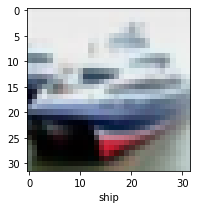

In [56]:
plt_sample(X_test, y_test,1)

In [58]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.69399951e-04, 2.16299256e-07, 5.82227631e-06, 9.87905264e-01,
        5.64172042e-05, 6.12242427e-03, 6.33163203e-04, 1.76304098e-07,
        5.10670803e-03, 4.58890867e-07],
       [1.18934055e-04, 5.97420963e-04, 7.83199653e-07, 2.01580619e-08,
        3.46409723e-09, 4.41585574e-10, 4.68285961e-08, 3.55553614e-10,
        9.99277532e-01, 5.28652981e-06],
       [6.64719343e-02, 1.45288333e-01, 1.01908518e-03, 2.57134121e-02,
        8.46711267e-03, 6.39643753e-04, 1.04155764e-03, 1.48395831e-02,
        6.17376506e-01, 1.19142786e-01],
       [9.87488687e-01, 1.11714995e-03, 4.93192067e-03, 2.03629327e-03,
        1.85245520e-03, 1.26098012e-05, 1.73509747e-04, 1.85692392e-04,
        1.73524069e-03, 4.66549565e-04],
       [1.17314485e-07, 3.95056254e-08, 2.06334377e-03, 1.98308397e-02,
        7.94227347e-02, 1.78208714e-03, 8.96894276e-01, 4.26364477e-06,
        2.35071093e-06, 4.85674301e-09]], dtype=float32)

In [57]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 9, 8, 0, 6]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

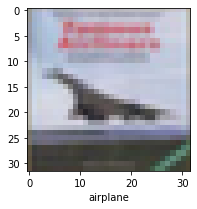

In [68]:
plt_sample(X_test, y_test,3)

In [71]:
classes[0]

'airplane'

In [72]:
y_pred=cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print('Classification Report: \n',  classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.89      0.74      0.81      1000
           2       0.69      0.53      0.60      1000
           3       0.52      0.53      0.52      1000
           4       0.60      0.75      0.67      1000
           5       0.66      0.58      0.62      1000
           6       0.76      0.76      0.76      1000
           7       0.72      0.77      0.75      1000
           8       0.80      0.82      0.81      1000
           9       0.77      0.83      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

